#Project : Build a Movie Recommendation System 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:

data1=pd.read_csv('/content/TMDB_10000_Popular_Movies.csv')

In [3]:
data1.head(2)

TMDb_Id    IMDb_Id      Title Original_Title  \
0   419704  tt2935510   Ad Astra       Ad Astra   
1   338762  tt1634106  Bloodshot      Bloodshot   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   

                     Genres  \
0   Drama | Science Fiction   
1  Action | Science Fiction   

                                                Cast  \
0  Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...   
1  Vin Diesel | Eiza González | Sam Heughan | Tob...   

                                                Crew Collection Release_Date  \
0  Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...     Single   2019-09-17   
1  John Papsidera | Matthew Vaughn | Jim May | Ne...     Single   2020-03-05   

  Release_Status Original_Language Languages_Spoken  Runtime  \
0       Released                en  English | Norsk    123.0   
1       Released                en          English    110.0   

                                          Tagline  Popularity  Rating_average  \
0  The answers we seek are just outside our reach     463.487             5.9   
1               Being a superhero is in his blood     235.701             7.2   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions | Keep Your Head | Mad...   
1          1384  Sony Pictures | Cross Creek Pictures | Mimran ...   

                           Country_of_Origin      Budget      Revenue  
0  Brazil | China | United States of America  87500000.0  127175922.0  
1           China | United States of America  42000000.0   24573617.0

In [4]:
data2=pd.read_csv('/content/TMDB_7000_Top_Rated_Movies.csv')

In [5]:
data2.head(2)

TMDb_Id    IMDb_Id                        Title  \
0    19404  tt0112870  Dilwale Dulhania Le Jayenge   
1      278  tt0111161     The Shawshank Redemption   

                 Original_Title  \
0  दिलवाले दुल्हनिया ले जायेंगे   
1      The Shawshank Redemption   

                                            Overview  \
0  Raj is a rich, carefree, happy-go-lucky second...   
1  Framed in the 1940s for the double murder of h...   

                     Genres  \
0  Comedy | Drama | Romance   
1             Crime | Drama   

                                                Cast  \
0  Shah Rukh Khan | Kajol | Amrish Puri | Anupam ...   
1  Tim Robbins | Morgan Freeman | Bob Gunton | Cl...   

                                                Crew Collection Release_Date  \
0  Farah Khan | Yash Chopra | Aditya Chopra | Adi...     Single   1995-10-20   
1  Thomas Newman | Thomas Newman | Roger Deakins ...     Single   1994-09-23   

  Release_Status Original_Language Languages_Spoken  Runtime  \
0       Released                hi           हिन्दी    190.0   
1       Released                en          English    142.0   

                                             Tagline  Popularity  \
0                Come Fall In love, All Over Again..      22.968   
1  Fear can hold you prisoner. Hope can set you f...      57.663   

   Rating_average  Rating_Count       Production_Companies  \
0             8.8          2230             Yash Raj Films   
1             8.7         15535  Castle Rock Entertainment   

          Country_of_Origin    Budget    Revenue  
0                     India  13200000  100000000  
1  United States of America  25000000   28341469

In [6]:
data=pd.concat([data1,data2], axis='rows')

In [7]:
data.head(2)

TMDb_Id    IMDb_Id      Title Original_Title  \
0   419704  tt2935510   Ad Astra       Ad Astra   
1   338762  tt1634106  Bloodshot      Bloodshot   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   

                     Genres  \
0   Drama | Science Fiction   
1  Action | Science Fiction   

                                                Cast  \
0  Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...   
1  Vin Diesel | Eiza González | Sam Heughan | Tob...   

                                                Crew Collection Release_Date  \
0  Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...     Single   2019-09-17   
1  John Papsidera | Matthew Vaughn | Jim May | Ne...     Single   2020-03-05   

  Release_Status Original_Language Languages_Spoken  Runtime  \
0       Released                en  English | Norsk    123.0   
1       Released                en          English    110.0   

                                          Tagline  Popularity  Rating_average  \
0  The answers we seek are just outside our reach     463.487             5.9   
1               Being a superhero is in his blood     235.701             7.2   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions | Keep Your Head | Mad...   
1          1384  Sony Pictures | Cross Creek Pictures | Mimran ...   

                           Country_of_Origin      Budget      Revenue  
0  Brazil | China | United States of America  87500000.0  127175922.0  
1           China | United States of America  42000000.0   24573617.0

##Data Preprocessing

In [8]:
data.shape

(17101, 22)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17101 entries, 0 to 7100
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TMDb_Id               17101 non-null  int64  
 1   IMDb_Id               17029 non-null  object 
 2   Title                 17101 non-null  object 
 3   Original_Title        17101 non-null  object 
 4   Overview              17060 non-null  object 
 5   Genres                17030 non-null  object 
 6   Cast                  17043 non-null  object 
 7   Crew                  17088 non-null  object 
 8   Collection            17100 non-null  object 
 9   Release_Date          17098 non-null  object 
 10  Release_Status        17100 non-null  object 
 11  Original_Language     17101 non-null  object 
 12  Languages_Spoken      17014 non-null  object 
 13  Runtime               17085 non-null  float64
 14  Tagline               13429 non-null  object 
 15  Popularity          

In [10]:
data['Languages_Spoken'].unique()

array(['English | Norsk', 'English', 'Español | English', ...,
       'Català | Español | Français | Galego | English',
       'Español | Français | Polski | Português',
       'Français | Nederlands | Português'], dtype=object)

In [11]:
data["Original_Language"].unique()

array(['en', 'fr', 'es', 'tr', 'ko', 'tl', 'ja', 'it', 'id', 'ru', 'pl',
       'cn', 'da', 'hi', 'sv', 'zh', 'no', 'lv', 'ro', 'ar', 'el', 'ta',
       'sq', 'de', 'ml', 'th', 'nl', 'pt', 'sr', 'mk', 'te', 'xx', 'hu',
       'is', 'sh', 'fa', 'cs', 'la', 'he', 'pa', 'nb', 'bs', 'vi', 'eu',
       'fi', 'af', 'ab', 'ka', 'ms', 'mr', 'et', 'uk'], dtype=object)

In [12]:
data=data.drop('Languages_Spoken',axis=1)

In [13]:
data["Original_Language"]=data["Original_Language"].replace("hi","hindi")
data["Original_Language"]=data["Original_Language"].replace("en","english")

In [14]:
data["Original_Language"].unique()

array(['english', 'fr', 'es', 'tr', 'ko', 'tl', 'ja', 'it', 'id', 'ru',
       'pl', 'cn', 'da', 'hindi', 'sv', 'zh', 'no', 'lv', 'ro', 'ar',
       'el', 'ta', 'sq', 'de', 'ml', 'th', 'nl', 'pt', 'sr', 'mk', 'te',
       'xx', 'hu', 'is', 'sh', 'fa', 'cs', 'la', 'he', 'pa', 'nb', 'bs',
       'vi', 'eu', 'fi', 'af', 'ab', 'ka', 'ms', 'mr', 'et', 'uk'],
      dtype=object)

In [15]:
data['movie_Id'] = data['TMDb_Id'].astype(int)
data.head(1)

TMDb_Id    IMDb_Id     Title Original_Title  \
0   419704  tt2935510  Ad Astra       Ad Astra   

                                            Overview                   Genres  \
0  The near future, a time when both hope and har...  Drama | Science Fiction   

                                                Cast  \
0  Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...   

                                                Crew Collection Release_Date  \
0  Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...     Single   2019-09-17   

  Release_Status Original_Language  Runtime  \
0       Released           english    123.0   

                                          Tagline  Popularity  Rating_average  \
0  The answers we seek are just outside our reach     463.487             5.9   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions | Keep Your Head | Mad...   

                           Country_of_Origin      Budget      Revenue  \
0  Brazil | China | United States of America  87500000.0  127175922.0   

   movie_Id  
0    419704

In [16]:
data.keys()

Index(['TMDb_Id', 'IMDb_Id', 'Title', 'Original_Title', 'Overview', 'Genres',
       'Cast', 'Crew', 'Collection', 'Release_Date', 'Release_Status',
       'Original_Language', 'Runtime', 'Tagline', 'Popularity',
       'Rating_average', 'Rating_Count', 'Production_Companies',
       'Country_of_Origin', 'Budget', 'Revenue', 'movie_Id'],
      dtype='object')

In [17]:
data.isnull().sum()

TMDb_Id                    0
IMDb_Id                   72
Title                      0
Original_Title             0
Overview                  41
Genres                    71
Cast                      58
Crew                      13
Collection                 1
Release_Date               3
Release_Status             1
Original_Language          0
Runtime                   16
Tagline                 3672
Popularity                 0
Rating_average             0
Rating_Count               0
Production_Companies     382
Country_of_Origin        133
Budget                     1
Revenue                    1
movie_Id                   0
dtype: int64

In [18]:
#As we have more number of missing data in 'Tagline' column. So, we have merged the 'Tagline' and 'Overview'
data.iloc[100].Tagline

'The Untold True Story'

In [19]:
data.iloc[100].Overview

'The untold true story set in the winter of 1925 that takes you across the treacherous terrain of the Alaskan tundra for an exhilarating and uplifting adventure that will test the strength, courage and determination of one man, Leonhard Seppala, and his lead sled dog, Togo.'

In [20]:
print(data.iloc[150].Tagline)
print(data.iloc[150].Overview)

Someone is coming back to Elm Street!
A new family moves into the house on Elm Street, and before long, the kids are again having nightmares about deceased child murderer Freddy Krueger. This time, Freddy attempts to possess a teenage boy to cause havoc in the real world, and can only be overcome if the boy's sweetheart can master her fear.


In [21]:
print(data.iloc[300].Tagline)
print(data.iloc[300].Overview)

One night a year, all crime is legal.
Given the country's overcrowded prisons, the U.S. government begins to allow 12-hour periods of time in which all illegal activity is legal. During one of these free-for-alls, a family must protect themselves from a home invasion.


In [22]:
print(data.iloc[10000].Tagline)
print(data.iloc[10000].Overview)

Come Fall In love, All Over Again..
Raj is a rich, carefree, happy-go-lucky second generation NRI. Simran is the daughter of Chaudhary Baldev Singh, who in spite of being an NRI is very strict about adherence to Indian values. Simran has left for India to be married to her childhood fiancé. Raj leaves for India with a mission at his hands, to claim his lady love under the noses of her whole family. Thus begins a saga.


#Difference between TAGLINE and Overview
In summary, a tagline is a catchy phrase used for promotional purposes to capture the essence of a movie, while an overview is a brief summary that provides a general description of the movie's plot or storyline.

So, there is greater chance that an overview will contain the the lines or words which is used in "Tagline". 

And, here we have 3672 null values in Tag line.
So, in place of removing null values and loosing the data we can fill the tagline with the "Overviews".

In [23]:
data["Tagline"].fillna(data["Overview"], inplace=True)

In [24]:
data.isnull().sum()
#Now, tagline has only 41 null values which we can drop easily.

TMDb_Id                   0
IMDb_Id                  72
Title                     0
Original_Title            0
Overview                 41
Genres                   71
Cast                     58
Crew                     13
Collection                1
Release_Date              3
Release_Status            1
Original_Language         0
Runtime                  16
Tagline                  41
Popularity                0
Rating_average            0
Rating_Count              0
Production_Companies    382
Country_of_Origin       133
Budget                    1
Revenue                   1
movie_Id                  0
dtype: int64

In [25]:
data=data.drop(["TMDb_Id","IMDb_Id",],axis=1)
data.head(1)

Title Original_Title                                           Overview  \
0  Ad Astra       Ad Astra  The near future, a time when both hope and har...   

                    Genres                                               Cast  \
0  Drama | Science Fiction  Brad Pitt | Tommy Lee Jones | Ruth Negga | Joh...   

                                                Crew Collection Release_Date  \
0  Brad Pitt | Arnon Milchan | Gary Rydstrom | Ga...     Single   2019-09-17   

  Release_Status Original_Language  Runtime  \
0       Released           english    123.0   

                                          Tagline  Popularity  Rating_average  \
0  The answers we seek are just outside our reach     463.487             5.9   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions | Keep Your Head | Mad...   

                           Country_of_Origin      Budget      Revenue  \
0  Brazil | China | United States of America  87500000.0  127175922.0   

   movie_Id  
0    419704

In [26]:
data.isnull().sum()

Title                     0
Original_Title            0
Overview                 41
Genres                   71
Cast                     58
Crew                     13
Collection                1
Release_Date              3
Release_Status            1
Original_Language         0
Runtime                  16
Tagline                  41
Popularity                0
Rating_average            0
Rating_Count              0
Production_Companies    382
Country_of_Origin       133
Budget                    1
Revenue                   1
movie_Id                  0
dtype: int64

In [27]:
data.shape

(17101, 20)

In [28]:
data=data.dropna()

In [29]:
data.isnull().sum().sum()

0

In [30]:
data.duplicated().sum()

6167

In [31]:
data=data.drop_duplicates(keep='first')

In [32]:
data.shape

(10436, 20)

In [33]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

# Extract year and convert it to integer
data['year_of_release'] = data['Release_Date'].dt.year.fillna(0).astype(np.int64)


In [34]:
data.describe(include='all')

Title Original_Title       Overview  Genres  \
count     10436          10436          10436   10436   
unique     9870           9932          10196    1512   
top     Dracula        Dracula  Plot unknown.  Comedy   
freq          5              5              4     685   
first       NaN            NaN            NaN     NaN   
last        NaN            NaN            NaN     NaN   
mean        NaN            NaN            NaN     NaN   
std         NaN            NaN            NaN     NaN   
min         NaN            NaN            NaN     NaN   
25%         NaN            NaN            NaN     NaN   
50%         NaN            NaN            NaN     NaN   
75%         NaN            NaN            NaN     NaN   
max         NaN            NaN            NaN     NaN   

                                                     Cast  \
count                                               10436   
unique                                              10196   
top     Matt Damon | Jodie Foster | Sharlto Copley | A...   
freq                                                    2   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     Crew Collection  \
count                                               10436      10436   
unique                                              10183       1037   
top     Roque Baños | Julio Fernández | Luis de la Mad...     Single   
freq                                                    2       7984   
first                                                 NaN        NaN   
last                                                  NaN        NaN   
mean                                                  NaN        NaN   
std                                                   NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   

               Release_Date Release_Status Original_Language       Runtime  \
count                 10436          10436             10436  10436.000000   
unique                 6054              4                47           NaN   
top     2020-04-09 00:00:00       Released           english           NaN   
freq                     14          10355              8480           NaN   
first   1902-09-01 00:00:00            NaN               NaN           NaN   
last    2023-02-16 00:00:00            NaN               NaN           NaN   
mean                    NaN            NaN               NaN    103.924971   
std                     NaN            NaN               NaN     24.843272   
min                     NaN            NaN               NaN      0.000000   
25%                     NaN            NaN               NaN     92.000000   
50%                     NaN            NaN               NaN    102.000000   
75%                     NaN            NaN               NaN    115.000000   
max                     NaN            NaN               NaN    400.000000   

                       Tagline    Popularity  Rating_average  Rating_Count  \
count                    10436  10436.000000    10436.000000  10436.000000   
unique                   10150           NaN             NaN           NaN   
top     Based on a t

In [35]:
#Removing the "pipe" symbol from the below mntioned features:
data['Genres'] = data['Genres'].str.replace('|', ',')
data['Cast'] = data['Cast'].str.replace('|', ',')
data['Crew'] = data['Crew'].str.replace('|', ',')

In [36]:
data['Production_Companies'] = data['Production_Companies'].str.replace('|', ',')
data['Country_of_Origin'] = data['Country_of_Origin'].str.replace('|', ',')

In [37]:
data.head(2)

Title Original_Title  \
0   Ad Astra       Ad Astra   
1  Bloodshot      Bloodshot   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   

                     Genres  \
0   Drama , Science Fiction   
1  Action , Science Fiction   

                                                Cast  \
0  Brad Pitt , Tommy Lee Jones , Ruth Negga , Joh...   
1  Vin Diesel , Eiza González , Sam Heughan , Tob...   

                                                Crew Collection Release_Date  \
0  Brad Pitt , Arnon Milchan , Gary Rydstrom , Ga...     Single   2019-09-17   
1  John Papsidera , Matthew Vaughn , Jim May , Ne...     Single   2020-03-05   

  Release_Status Original_Language  Runtime  \
0       Released           english    123.0   
1       Released           english    110.0   

                                          Tagline  Popularity  Rating_average  \
0  The answers we seek are just outside our reach     463.487             5.9   
1               Being a superhero is in his blood     235.701             7.2   

   Rating_Count                               Production_Companies  \
0          2863  New Regency Productions , Keep Your Head , Mad...   
1          1384  Sony Pictures , Cross Creek Pictures , Mimran ...   

                           Country_of_Origin      Budget      Revenue  \
0  Brazil , China , United States of America  87500000.0  127175922.0   
1           China , United States of America  42000000.0   24573617.0   

   movie_Id  year_of_release  
0    419704             2019  
1    338762             2020

#Data Visualization

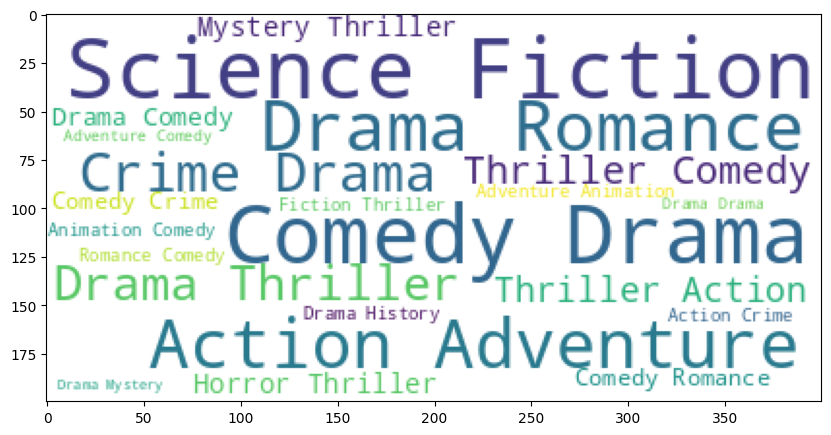

In [38]:
from wordcloud import WordCloud

wc = WordCloud(width=400, height=200, background_color = 'white', min_font_size=7)

gen_wc=wc.generate(data['Genres'].str.cat(sep=" "))
plt.figure(figsize=(10,15))
plt.imshow(gen_wc)

<Axes: >

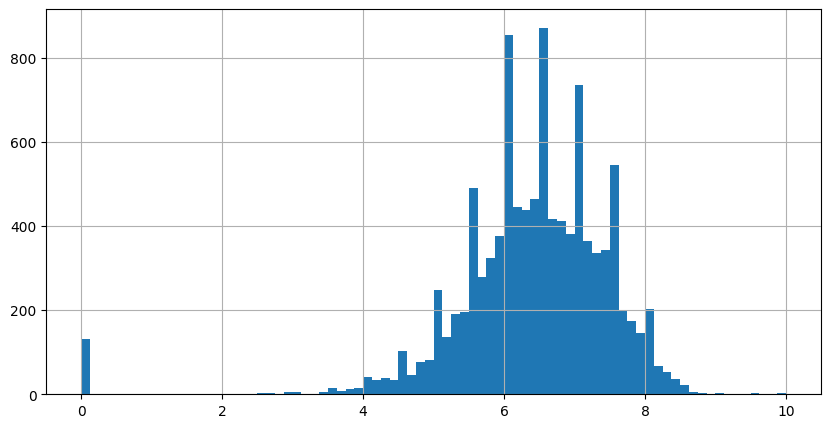

In [39]:
plt.figure(figsize =(10, 5))
data['Rating_average'].hist(bins = 80)

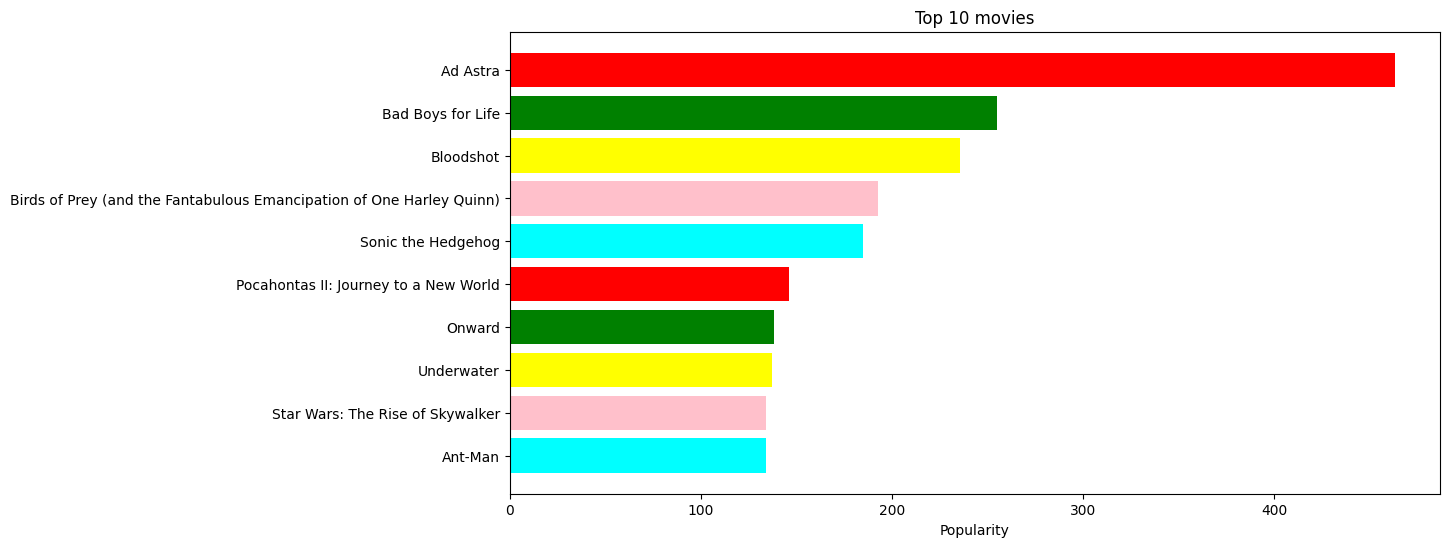

In [40]:
Popularity = data.sort_values("Popularity", ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(Popularity["Title"].head(10), Popularity["Popularity"].head(10), align="center",color=['red','green','yellow','pink','cyan'])
plt.gca().invert_yaxis()
plt.title("Top 10 movies")
plt.xlabel("Popularity")
plt.show()

In [41]:
data.columns

Index(['Title', 'Original_Title', 'Overview', 'Genres', 'Cast', 'Crew',
       'Collection', 'Release_Date', 'Release_Status', 'Original_Language',
       'Runtime', 'Tagline', 'Popularity', 'Rating_average', 'Rating_Count',
       'Production_Companies', 'Country_of_Origin', 'Budget', 'Revenue',
       'movie_Id', 'year_of_release'],
      dtype='object')

In [42]:
data[data['Runtime']>=180]['Title']

75                                  Avengers: Endgame
149                                      The Irishman
180                                           Titanic
194                           The Wolf of Wall Street
198     The Lord of the Rings: The Return of the King
                            ...                      
10                                     The Green Mile
56                                  The Best of Youth
869                Fabrizio De André: Principe libero
1910                        Blue Is the Warmest Color
2968                                        King Kong
Name: Title, Length: 92, dtype: object

In [43]:
#Runtime:  It represents the total running time of the film, usually measured in minutes.
Top_10=data.nlargest(10,'Runtime')[['Title','Runtime']]
set_index=('Title')

In [44]:
Top_10

Title  Runtime
9248  Crystal Lake Memories: The Complete History of...    400.0
56                                    The Best of Youth    366.0
6541                                               1900    317.0
7458                                        The Kingdom    273.0
9166                                         Gettysburg    254.0
6585                                          Cleopatra    248.0
1486                 Kill Bill: The Whole Bloody Affair    247.0
7098                                             Hamlet    242.0
7811                                      Love Exposure    237.0
7947                              A Brighter Summer Day    237.0

In [45]:
data['year_of_release'].value_counts()

2019    587
2017    521
2018    493
2016    485
2014    467
       ... 
1924      1
1930      1
1920      1
1902      1
1915      1
Name: year_of_release, Length: 108, dtype: int64

In [46]:
data[data['Revenue'].max()==data['Revenue']]['Title']


75    Avengers: Endgame
Name: Title, dtype: object

In [47]:
top_10=data.nlargest(10,'Rating_Count')[['Title','Rating_Count']]
set_index=('Title')

In [48]:
top_10

Title  Rating_Count
81                 Inception         25159
128                 Deadpool         22246
87              The Avengers         21907
47              Interstellar         21605
89           The Dark Knight         21575
16           The Dark Knight         21575
132                   Avatar         20789
404  Guardians of the Galaxy         20146
245               Fight Club         18679
218             Pulp Fiction         18018

In [49]:
top_voted = data.sort_values(['Rating_Count'], ascending = False)

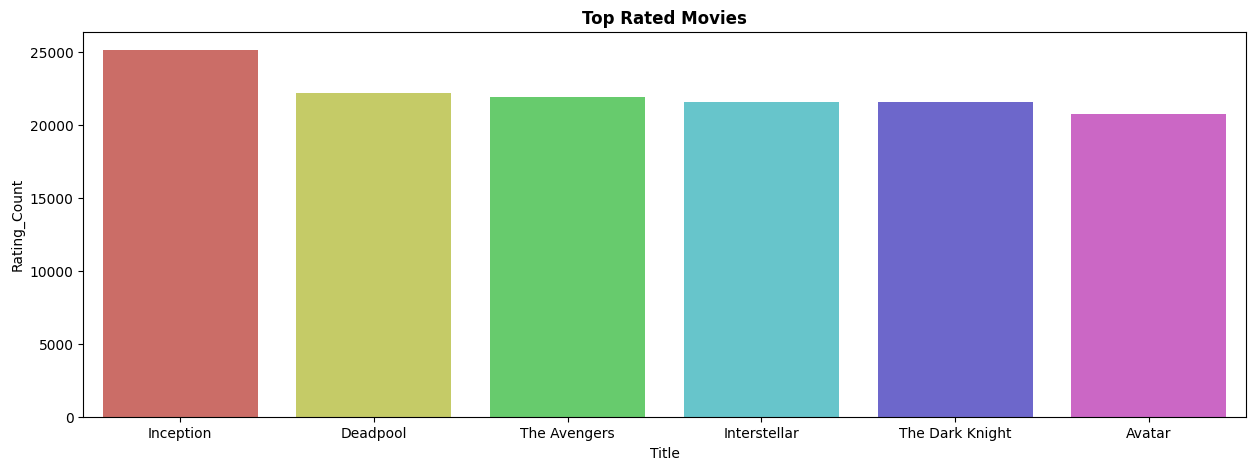

In [50]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Title'][:7],y=top_voted['Rating_Count'][:7], palette = 'hls')
g.set_title("Top Rated Movies", weight = "bold")
plt.show()

# Recommendation System


In [51]:
features=['Title','Overview','Genres','Cast','Crew','Tagline','Original_Language','Production_Companies','Country_of_Origin', 'movie_Id','year_of_release']

In [52]:
movies=data[features].copy()
data.reset_index(drop=True, inplace=True)

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10436 entries, 0 to 7093
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 10436 non-null  object
 1   Overview              10436 non-null  object
 2   Genres                10436 non-null  object
 3   Cast                  10436 non-null  object
 4   Crew                  10436 non-null  object
 5   Tagline               10436 non-null  object
 6   Original_Language     10436 non-null  object
 7   Production_Companies  10436 non-null  object
 8   Country_of_Origin     10436 non-null  object
 9   movie_Id              10436 non-null  int64 
 10  year_of_release       10436 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 978.4+ KB


In [54]:
movies.head()

Title  \
0                        Ad Astra   
1                       Bloodshot   
2               Bad Boys for Life   
3                         Ant-Man   
4  Percy Jackson: Sea of Monsters   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   
2  Marcus and Mike are forced to confront new thr...   
3  Armed with the astonishing ability to shrink i...   
4  In their quest to confront the ultimate evil, ...   

                                 Genres  \
0               Drama , Science Fiction   
1              Action , Science Fiction   
2             Action , Crime , Thriller   
3  Action , Adventure , Science Fiction   
4          Adventure , Fantasy , Family   

                                                Cast  \
0  Brad Pitt , Tommy Lee Jones , Ruth Negga , Joh...   
1  Vin Diesel , Eiza González , Sam Heughan , Tob...   
2  Will Smith , Martin Lawrence , Paola Nuñez , V...   
3  Paul Rudd , Michael Douglas , Evangeline Lilly...   
4  Logan Lerman , Alexandra Daddario , Douglas Sm...   

                                                Crew  \
0  Brad Pitt , Arnon Milchan , Gary Rydstrom , Ga...   
1  John Papsidera , Matthew Vaughn , Jim May , Ne...   
2  Jerry Bruckheimer , Mike Stenson , Chad Oman ,...   
3  David Lazan , Jackie Burch , Sala Baker , Sala...   
4  Mark Goldblatt , Shelly Johnson , Karen Rosenf...   

                                          Tagline Original_Language  \
0  The answers we seek are just outside our reach           english   
1               Being a superhero is in his blood           english   
2                    Ride together. Die together.           english   
3                    Heroes don't get any bigger.           english   
4       Where There Are Gods, There Are Monsters.           english   

                                Production_Companies  \
0  New Regency Productions , Keep Your Head , Mad...   
1  Sony Pictures , Cross Creek Pictures , Mimran ...   
2  Columbia Pictures , Platinum Dunes , 2.0 Enter...   
3                                     Marvel Studios   
4  Fox 2000 Pictures , Sunswept Entertainment , 1...   

                           Country_of_Origin  movie_Id  year_of_release  
0  Brazil , China , United States of America    419704             2019  
1           China , United States of America    338762             2020  
2          France , United States of America     38700             2020  
3                   United States of America    102899             2015  
4                   United States of America     76285             2013

In [55]:
# Now, we can see that in some of the columns there are more than one word in a record.Like in "Cast" column there 
#will be a person name- "Tommy Doughlas" and other person "Tommy David"
# So, after converting them they each name will form two tags "Tommy" and "Doughlas"
#Again, "Tommy" and "David"
#Now, if I want to see the movie of "Tommy Doughlas" but in this scenario there might be chance that our model will confuse 
# show the movie of "Tommy David" because then it will see "Tommy" at two places.
#So, for that reasons, I will remove the spaces among the words and make them a single entity.

This line of code is replacing the spaces (" ") in the "Title" column with an empty string (""). The str.replace() method is used to search for the specified pattern (in this case, a space) and replace it with the specified string (an empty string). By using the str accessor, we can apply string methods to the values in the column.

In [56]:


movies['Genres'] = movies['Genres'].str.replace(" ", "")
movies['Cast'] = movies['Cast'].str.replace(" ", "")
movies['Crew'] = movies['Crew'].str.replace(" ", "")
movies['Tagline'] = movies['Tagline'].str.replace(" ", "")

In [57]:
movies.head(5)

Title  \
0                        Ad Astra   
1                       Bloodshot   
2               Bad Boys for Life   
3                         Ant-Man   
4  Percy Jackson: Sea of Monsters   

                                            Overview  \
0  The near future, a time when both hope and har...   
1  After he and his wife are murdered, marine Ray...   
2  Marcus and Mike are forced to confront new thr...   
3  Armed with the astonishing ability to shrink i...   
4  In their quest to confront the ultimate evil, ...   

                            Genres  \
0             Drama,ScienceFiction   
1            Action,ScienceFiction   
2            Action,Crime,Thriller   
3  Action,Adventure,ScienceFiction   
4         Adventure,Fantasy,Family   

                                                Cast  \
0  BradPitt,TommyLeeJones,RuthNegga,JohnOrtiz,Liv...   
1  VinDiesel,EizaGonzález,SamHeughan,TobyKebbell,...   
2  WillSmith,MartinLawrence,PaolaNuñez,VanessaHud...   
3  PaulRudd,MichaelDouglas,EvangelineLilly,CoreyS...   
4  LoganLerman,AlexandraDaddario,DouglasSmith,Lev...   

                                                Crew  \
0  BradPitt,ArnonMilchan,GaryRydstrom,GaryRydstro...   
1  JohnPapsidera,MatthewVaughn,JimMay,NealH.Morit...   
2  JerryBruckheimer,MikeStenson,ChadOman,JonBilli...   
3  DavidLazan,JackieBurch,SalaBaker,SalaBaker,Dav...   
4  MarkGoldblatt,ShellyJohnson,KarenRosenfelt,Chr...   

                                  Tagline Original_Language  \
0  Theanswersweseekarejustoutsideourreach           english   
1             Beingasuperheroisinhisblood           english   
2               Ridetogether.Dietogether.           english   
3                Heroesdon'tgetanybigger.           english   
4     WhereThereAreGods,ThereAreMonsters.           english   

                                Production_Companies  \
0  New Regency Productions , Keep Your Head , Mad...   
1  Sony Pictures , Cross Creek Pictures , Mimran ...   
2  Columbia Pictures , Platinum Dunes , 2.0 Enter...   
3                                     Marvel Studios   
4  Fox 2000 Pictures , Sunswept Entertainment , 1...   

                           Country_of_Origin  movie_Id  year_of_release  
0  Brazil , China , United States of America    419704             2019  
1           China , United States of America    338762             2020  
2          France , United States of America     38700             2020  
3                   United States of America    102899             2015  
4                   United States of America     76285             2013

In [58]:
movies['year_of_release'] = movies['year_of_release'].astype(str)

In [59]:
movies['tags']=movies['Overview']+movies['Genres']+movies['Cast']+movies['Crew']+movies['Tagline']+movies['Production_Companies']+movies['Country_of_Origin']+movies['year_of_release']

In [60]:
movies.head(2)
#"Tags" column is created which contains all the data of "Genres", "Cast", "Crew", "Tagline", "Production_Companies","Country of Origin"

Title                                           Overview  \
0   Ad Astra  The near future, a time when both hope and har...   
1  Bloodshot  After he and his wife are murdered, marine Ray...   

                  Genres                                               Cast  \
0   Drama,ScienceFiction  BradPitt,TommyLeeJones,RuthNegga,JohnOrtiz,Liv...   
1  Action,ScienceFiction  VinDiesel,EizaGonzález,SamHeughan,TobyKebbell,...   

                                                Crew  \
0  BradPitt,ArnonMilchan,GaryRydstrom,GaryRydstro...   
1  JohnPapsidera,MatthewVaughn,JimMay,NealH.Morit...   

                                  Tagline Original_Language  \
0  Theanswersweseekarejustoutsideourreach           english   
1             Beingasuperheroisinhisblood           english   

                                Production_Companies  \
0  New Regency Productions , Keep Your Head , Mad...   
1  Sony Pictures , Cross Creek Pictures , Mimran ...   

                           Country_of_Origin  movie_Id year_of_release  \
0  Brazil , China , United States of America    419704            2019   
1           China , United States of America    338762            2020   

                                                tags  
0  The near future, a time when both hope and har...  
1  After he and his wife are murdered, marine Ray...

In [61]:
new_data=movies[['movie_Id','Title','tags']]

In [62]:
new_data.head(2)

movie_Id      Title                                               tags
0    419704   Ad Astra  The near future, a time when both hope and har...
1    338762  Bloodshot  After he and his wife are murdered, marine Ray...

In [63]:
new_data['tags'][0]

"The near future, a time when both hope and hardships drive humanity to look to the stars and beyond. While a mysterious phenomenon menaces to destroy life on planet Earth, astronaut Roy McBride undertakes a mission across the immensity of space and its many perils to uncover the truth about a lost expedition that decades before boldly faced emptiness and silence in search of the unknown.Drama,ScienceFictionBradPitt,TommyLeeJones,RuthNegga,JohnOrtiz,LivTyler,DonaldSutherland,GregBryk,LorenDean,KimberlyElise,JohnFinn,LisaGayHamilton,DonnieKeshawarz,BobbyNish,SeanBlakemore,FredaFohShen,KaylaAdams,RaviKapoor,ElisaPerry,DanielSauli,KimmyShields,KunalDudheker,AlysonReed,SashaCompère,JustinDray,AlexandriaRousset,NatashaLyonne,ZoroSaroManuelDaghlian,JacobSandler,ElizabethWillamanBradPitt,ArnonMilchan,GaryRydstrom,GaryRydstrom,GaryRydstrom,HankCorwin,TomJohnson,DouglasAibel,ChristaMunro,KarenO'Hara,DanBradley,DanBradley,AlbertWolsky,DarrellHall,KevinConstant,DedeGardner,JamesGray,JamesGray,Jam

In [64]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

string.punctuation is a string constant in the Python string module that contains a collection of punctuation characters. It includes the following characters:

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

These characters are commonly used as punctuation marks in written text. They are often used to indicate the separation or organization of words, phrases, and sentences within a text.

In the context of text processing or text analysis tasks, string.punctuation can be used as a convenient reference to check if a character is a punctuation mark. For example, you can use it to remove punctuation from text, split text into individual words while excluding punctuation, or perform other operations that involve identifying or handling punctuation in text data.

In [65]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The given code defines a function called transform_text that takes a text input as a parameter and performs several transformations on it. Let's go through the code step by step to understand its functionality:

text = text.lower(): Converts the input text to lowercase. This step helps in standardizing the text and treating uppercase and lowercase versions of the same word as equal.

text = nltk.word_tokenize(text): Tokenizes the text into individual words. The word_tokenize() function from the NLTK library is used for this purpose. Tokenization breaks down the text into a list of words or tokens.

y = []: Initializes an empty list y that will be used to store the processed words.

for i in text:: Iterates through each word in the tokenized text.

if i.isalnum():: Checks if the word consists only of alphanumeric characters (letters or numbers).

y.append(i): If the word is alphanumeric, it is added to the y list.

text = y[:] and y.clear(): Copies the contents of the y list to the text variable and clears the y list for reuse.

for i in text:: Iterates through each word in the text list.

if i not in stopwords.words('english') and i not in string.punctuation:: Checks if the word is not in the NLTK English stopwords list and not in the string punctuation.

y.append(i): If the word passes the above condition, it is added to the y list.

return " ".join(y): Joins the words in the y list into a single string separated by spaces, and returns the resulting string.

Overall, the transform_text function performs text preprocessing steps such as converting the text to lowercase, tokenizing it into words, removing non-alphanumeric characters, removing stopwords, and punctuation. It returns a processed string where the remaining words are joined back together. This function can be useful for cleaning and preparing text data before further analysis or modeling tasks.

In [66]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
       y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  return " ".join(y)

In [67]:
new_data['tags']=new_data['tags'].apply(transform_text)

In [68]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Instantiate the lemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
def lem(text):
    y = []

    for i in text.split():
        y.append(lemma.lemmatize(i))

    return " ".join(y)

new_data['tags'].apply(lem)


0       near future time hope hardship drive humanity ...
1       wife murdered marine ray garrison resurrected ...
2       marcus mike forced confront new threat career ...
3       armed astonishing ability shrink scale increas...
4       quest confront ultimate evil percy friend batt...
                              ...                        
7049    hunger game spoof kantmiss evershot must fight...
7050    event lake victoria prehistoric school piranha...
7063    stuck corridor time godefroy de montmirail fai...
7071    old comedian aldo baglio brought child nursing...
7093    four corps hand new york city gumshoe mike rei...
Name: tags, Length: 10436, dtype: object

In [70]:
new_data.head()

movie_Id                           Title  \
0    419704                        Ad Astra   
1    338762                       Bloodshot   
2     38700               Bad Boys for Life   
3    102899                         Ant-Man   
4     76285  Percy Jackson: Sea of Monsters   

                                                tags  
0  near future time hope hardships drive humanity...  
1  wife murdered marine ray garrison resurrected ...  
2  marcus mike forced confront new threats career...  
3  armed astonishing ability shrink scale increas...  
4  quest confront ultimate evil percy friends bat...

# 1.  Content Based Recommendation System

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
cv= CountVectorizer(max_features=11000)


In [73]:
vectors=cv.fit_transform(new_data['tags']).toarray()

In [74]:
vectors.shape    #10436- Movies and 284768-no. of words 

(10436, 11000)

In [75]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

In [78]:
similarity= cosine_similarity(vectors)


In [81]:
similarity[1]  # Similarity of movie present at index 1 to other movies 

array([0.12462195, 1.        , 0.15907119, ..., 0.        , 0.        ,
       0.20138311])

In [86]:
#How to fetch the movie details
new_data[new_data['Title'] == 'Ant-Man']


movie_Id    Title                                               tags
3    102899  Ant-Man  armed astonishing ability shrink scale increas...

In [83]:
# HOW TO FETCH THE Index of the movie 
new_data[new_data['Title'] == 'Ant-Man'].index[0]

#So, the movie "Ant-Man is present at index-3"

3

In [89]:
#Why using enumerate function
#Using enumerate function because when we do "sorting", the index position will lose as when it is arranged in descending order the index position lost
sorted(similarity[0])     #----> It is showing the similarity of the movie present at Oth index and the 0th, 1st, 2nd......and so on

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [90]:
#But, as we do sorting that index position will loose and the movie will xome at top whose similarity is maximum with which we are calculating
sorted(similarity[0],reverse=True)

[1.0000000000000004,
 0.2874512811364212,
 0.244853347113136,
 0.22090514936767752,
 0.20485900789263356,
 0.14949135328741203,
 0.13829563644637993,
 0.1368193670915872,
 0.1362701850189998,
 0.13496272169648602,
 0.13449652782781732,
 0.1339558646789255,
 0.13223592098145723,
 0.1306770933723292,
 0.12893539537698928,
 0.12803687993289598,
 0.12803687993289598,
 0.12803687993289595,
 0.1277532984553123,
 0.12765974544672137,
 0.1267754020759564,
 0.1267754020759564,
 0.12675004445952595,
 0.12462194771917917,
 0.12448665080846298,
 0.12436041133915637,
 0.1242886442399761,
 0.12421401880890737,
 0.12283899534733818,
 0.122426673556568,
 0.12242667355656799,
 0.12242667355656799,
 0.12146644952683741,
 0.12098347962395684,
 0.12075403018835411,
 0.12071432805669137,
 0.12071432805669136,
 0.11991752510433928,
 0.1197675343951021,
 0.11889138850911768,
 0.11887925859136851,
 0.11853911695403994,
 0.11768446184934014,
 0.11768446184934014,
 0.11749469908920937,
 0.11749469908920936,
 0.

In [94]:
#For this we will use "enumerate" function which will hold the index position of all the movies even they are arranged
sorted(list(enumerate(similarity[0])),reverse=True,key = lambda x: x[1]) #--> We want to compare the similarity whose similarity is greater except the first index because that will be the same movie

[(0, 1.0000000000000004),
 (3378, 0.2874512811364212),
 (5487, 0.244853347113136),
 (2402, 0.22090514936767752),
 (6025, 0.20485900789263356),
 (1534, 0.14949135328741203),
 (1587, 0.13829563644637993),
 (9459, 0.1368193670915872),
 (912, 0.1362701850189998),
 (5938, 0.13496272169648602),
 (5137, 0.13449652782781732),
 (6248, 0.1339558646789255),
 (261, 0.13223592098145723),
 (6729, 0.1306770933723292),
 (2370, 0.12893539537698928),
 (3740, 0.12803687993289598),
 (8587, 0.12803687993289598),
 (6583, 0.12803687993289595),
 (588, 0.1277532984553123),
 (1681, 0.12765974544672137),
 (5655, 0.1267754020759564),
 (6282, 0.1267754020759564),
 (5061, 0.12675004445952595),
 (1, 0.12462194771917917),
 (1933, 0.12448665080846298),
 (7400, 0.12436041133915637),
 (8785, 0.1242886442399761),
 (2516, 0.12421401880890737),
 (321, 0.12283899534733818),
 (5963, 0.122426673556568),
 (3441, 0.12242667355656799),
 (8237, 0.12242667355656799),
 (4762, 0.12146644952683741),
 (1802, 0.12098347962395684),
 (39

In [102]:
def recommend(movie):
    index = new_data[new_data['Title'] == movie].index[0] #finding the index of the movie
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])     
    for i in distances[1:10]:
        print(new_data.iloc[i[0]].Title)

In [104]:
recommend('Ant-Man')

Ant-Man and the Wasp
Avengers: Endgame
Captain America: Civil War
Avengers: Infinity War
Thor: Ragnarok
Doctor Strange
Iron Man 3
Iron Man
Captain Marvel


In [105]:
recommend('Avatar')

Finding Your Feet
Rebirth
If I Were a Boy
House of Flying Daggers
Life Itself
Samson
Whitney: Can I Be Me
The Clan
The Bouncer


In [106]:
#for deployment

In [107]:
import pickle

In [108]:
data['Title'].values

array(['Ad Astra', 'Bloodshot', 'Bad Boys for Life', ...,
       'The Visitors: Bastille Day', 'Fuga da Reuma Park', 'FearDotCom'],
      dtype=object)

In [109]:
similarity=pickle.dump(similarity,open('similarity.pkl','wb'))
movies_dict=pickle.dump(new_data.to_dict(),open('movies_data.pkl','wb'))